# Objective  of EDA:

### EDA  course_title
1. Total number of cources offered
2. Longest couse_title/shortes course title
3. Cleaning couse_title
4. Top 50 frequent tokens in couse_title

### EDA is_paid
1. Type under is_paid columns and their value_counts 

### EDA Subject
1. Distribution of subject with pie chart
2. Distribution of subject with bar chart and is_paid
3. Subjectwise number of subscribers
4. Distribution of Subject and level 
5. Subject wise price distribution
6. Yearwise subject 

### EDA price
1. Distribution of price with bar plot
2. distribution of subject having max. price : Business Finance (count 140) followed by web development (110)

### EDA Level & Reviews
 1. Distribution of Level and Reviews
 2. course_title for which max num_reviews received
 
### Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration 
### EDA Published Year
Number of courses per year
Distribution of subjects per year
Which year has the highest number of courses
What is the trend of courses per year

Observation :
1. Total coures_title in dataset is 3683 out which number of unique title is 3668.
2. Course having maximum coure_title length is 'Aprendiendo piano: Lectura de piezas clásicas Vol.II'
3. Top50 frequently used words list extracted.
4. Web_development course is more popular one followed by Business_Finance.
5. in 2016 number of Suscribers for web development was heighest
6. Demand of Courses related to Musical in year 2017 , increases.
7. Heighst price of course is 20.
8. Subject for which more number price is Business_Finance
9. Subscriber are categorised in 4 levels - All ,Intermediate ,Begineer and expert .
10. Most profitable course is: 
course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
profit                                                        24316800.0
published_date                                                2015-11-02

11. Number of subscribers decreases with increase in price.



In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('udemy_course_data.csv')
df.head(2)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   

   num_subscribers  num_reviews  num_lectures       level content_duration  \
0             2147           23            51  All Levels        1.5 hours   
1             2792          923           274  All Levels         39 hours   

    published_timestamp           subject  profit published_date  \
0  2017-01-18T20:58:58Z  Business Finance  429400     2017-01-18   
1  2017-03-09T16:34:20Z  Business Finance  209400     2017-03-09   

  published_time  year  month  day  
0      20:58:58Z  2017      1   18  
1      16:34:20Z  2017      3    9

In [4]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

In [6]:
df.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.683000e+03  3683.000000      3683.000000   3683.000000   3683.000000   
mean   6.764546e+05    65.992398      3193.371165    156.448004     40.062178   
std    3.437217e+05    60.985586      9498.231406    935.078241     50.366788   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.077270e+05    20.000000       110.000000      4.000000     15.000000   
50%    6.882440e+05    45.000000       911.000000     18.000000     25.000000   
75%    9.617290e+05    95.000000      2537.500000     67.000000     45.000000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

             profit         year        month          day  
count  3.683000e+03  3683.000000  3683.000000  3683.000000  
mean   2.402885e+05  2015.433342     6.162639    15.841162  
std    1.000760e+06     1.185920     3.379314     8.780906  
min    0.000000e+00  2011.000000     1.000000     1.000000  
25%    1.567500e+03  2015.000000     3.000000     8.000000  
50%    2.305000e+04  2016.000000     6.000000    16.000000  
75%    1.182600e+05  2016.000000     9.000000    23.000000  
max    2.431680e+07  2017.000000    12.000000    31.000000

In [7]:
object=df.select_dtypes(include='O')
object.columns

Index(['course_title', 'url', 'level', 'content_duration',
       'published_timestamp', 'subject', 'published_date', 'published_time'],
      dtype='object')

In [8]:
numerical=df.select_dtypes(exclude='O')
numerical.columns

Index(['course_id', 'is_paid', 'price', 'num_subscribers', 'num_reviews',
       'num_lectures', 'profit', 'year', 'month', 'day'],
      dtype='object')

In [9]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
dtype: int64

In [10]:
df.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         0
year                   0
month                  0
day                    0
dtype: int64

## EDA  course_title
1. Total number of cources offered
2. Longest couse_title/shortes course title
3. Cleaning couse_title
4. Top 50 frequent tokens in couse_title

In [12]:
# Total Uniqe Course 
df['course_title'].drop_duplicates().value_counts().sum()

3668

In [13]:
df.shape

(3683, 18)

In [89]:
#Longest couse_title
df[df['course_title'].str.len()==max(df['course_title'].str.len())] # will print course_title having maximum length

course_id                                       course_title  \
2191     286898  Aprende a tocar el Acordeón 'de oído y con téc...   

                                                    url  is_paid  price  \
2191  https://www.udemy.com/aprende-los-secretos-de-...     True   75.0   

      num_subscribers  num_reviews  num_lectures       level content_duration  \
2191              158           17            59  All Levels        2.5 hours   

       published_timestamp              subject   profit published_date  \
2191  2014-07-28T13:55:43Z  Musical Instruments  11850.0     2014-07-28   

     published_time  year  month  day  
2191      13:55:43Z  2014      7   28

In [61]:
df['course_title'].iloc[2190] # will print name of course having maximum coure_title length

'Aprendiendo piano: Lectura de piezas clásicas Vol.II'

### Keyword Extraction

In [139]:
# Text Cleaning to remove stopwords
import neattext.functions as nfx

In [140]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [141]:
df['Clean_title'] = df['course_title'].apply(nfx.remove_shortwords)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [142]:
# head on head comparision

temp = df[['Clean_title','course_title']]

temp.head()

Clean_title  \
0                Ultimate Investment Banking Course   
1  Complete Course Certification Grow Your Practice   
2  Financial Modeling Business Analysts Consultants   
3            Beginner Financial Analysis Excel 2017   
4             Maximize Your Profits Trading Options   

                                        course_title  
0                 Ultimate Investment Banking Course  
1  Complete GST Course & Certification - Grow You...  
2  Financial Modeling for Business Analysts and C...  
3  Beginner to Pro - Financial Analysis in Excel ...  
4       How To Maximize Your Profits Trading Options

In [144]:
# finding the maximum length of the clean title
temp[temp['Clean_title'].str.len()==max(temp['Clean_title'].str.len())]

Clean_title  \
293  Multiply your returns using Value Investing ht...   

                                          course_title  
293  Multiply your returns using 'Value Investing",...

In [145]:
temp['Clean_title'].iloc[293]

'Multiply your returns using Value Investing https udemy multiply your returns using value investing true 1942 Levels hours 2015 23T00 874284 Weekly Forex Analysis Baraq'

In [146]:
temp['course_title'].iloc[293]

'Multiply your returns using \'Value Investing",https://www.udemy.com/multiply-your-returns-using-value-investing/,true,20,1942,19,63,All Levels,4.5 hours,2015-07-23T00:08:33Z\n874284,Weekly Forex Analysis by Baraq FX"'

In [150]:
df['Clean_title'] = df['Clean_title'].apply(nfx.remove_special_characters)
df['Clean_title'].iloc[1:5]

1    Complete Course Certification Grow Your Practice
2    Financial Modeling Business Analysts Consultants
3              Beginner Financial Analysis Excel 2017
4               Maximize Your Profits Trading Options
Name: Clean_title, dtype: object

In [161]:
# tokenisation
all_title_list = df['Clean_title'].to_list()
all_title_list[1:5]

['Complete Course Certification Grow Your Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Financial Analysis Excel 2017',
 'Maximize Your Profits Trading Options']

In [162]:
alltokens = [token for line in all_title_list for token in line.split()]
print(len(alltokens))
print(alltokens[1:4])

18227
['Investment', 'Banking', 'Course']


In [163]:
all_tokens=[ token for line in all_title_list for token in line.split()]
len(all_tokens)
all_tokens[1:8]

['Investment',
 'Banking',
 'Course',
 'Complete',
 'Course',
 'Certification',
 'Grow']

In [156]:
## top50 frequently used words 
from collections import Counter
freq_words = dict(Counter(alltokens).most_common(50))
freq_words

{'Learn': 495,
 'Trading': 281,
 'with': 278,
 'Course': 235,
 'Beginners': 235,
 'Guitar': 211,
 'Design': 189,
 'Complete': 181,
 'Piano': 179,
 'Photoshop': 169,
 'Forex': 165,
 'Build': 164,
 'Financial': 139,
 'Beginner': 138,
 'Create': 136,
 'JavaScript': 124,
 'Your': 119,
 'HTML': 118,
 'Guide': 116,
 'Accounting': 114,
 'Website': 111,
 'from': 111,
 'Development': 110,
 'Options': 101,
 'From': 101,
 'Play': 100,
 'Adobe': 100,
 'With': 99,
 'Introduction': 93,
 'Master': 92,
 'Illustrator': 90,
 'Basics': 89,
 'Scratch': 83,
 'WordPress': 83,
 'Level': 80,
 'Professional': 79,
 'Analysis': 78,
 'Advanced': 77,
 'Easy': 76,
 'Lessons': 73,
 'HTML5': 68,
 'Trade': 66,
 'Stock': 65,
 'Bootstrap': 64,
 'Business': 62,
 'play': 61,
 'Angular': 58,
 'your': 57,
 'Building': 56,
 'Stocks': 55}

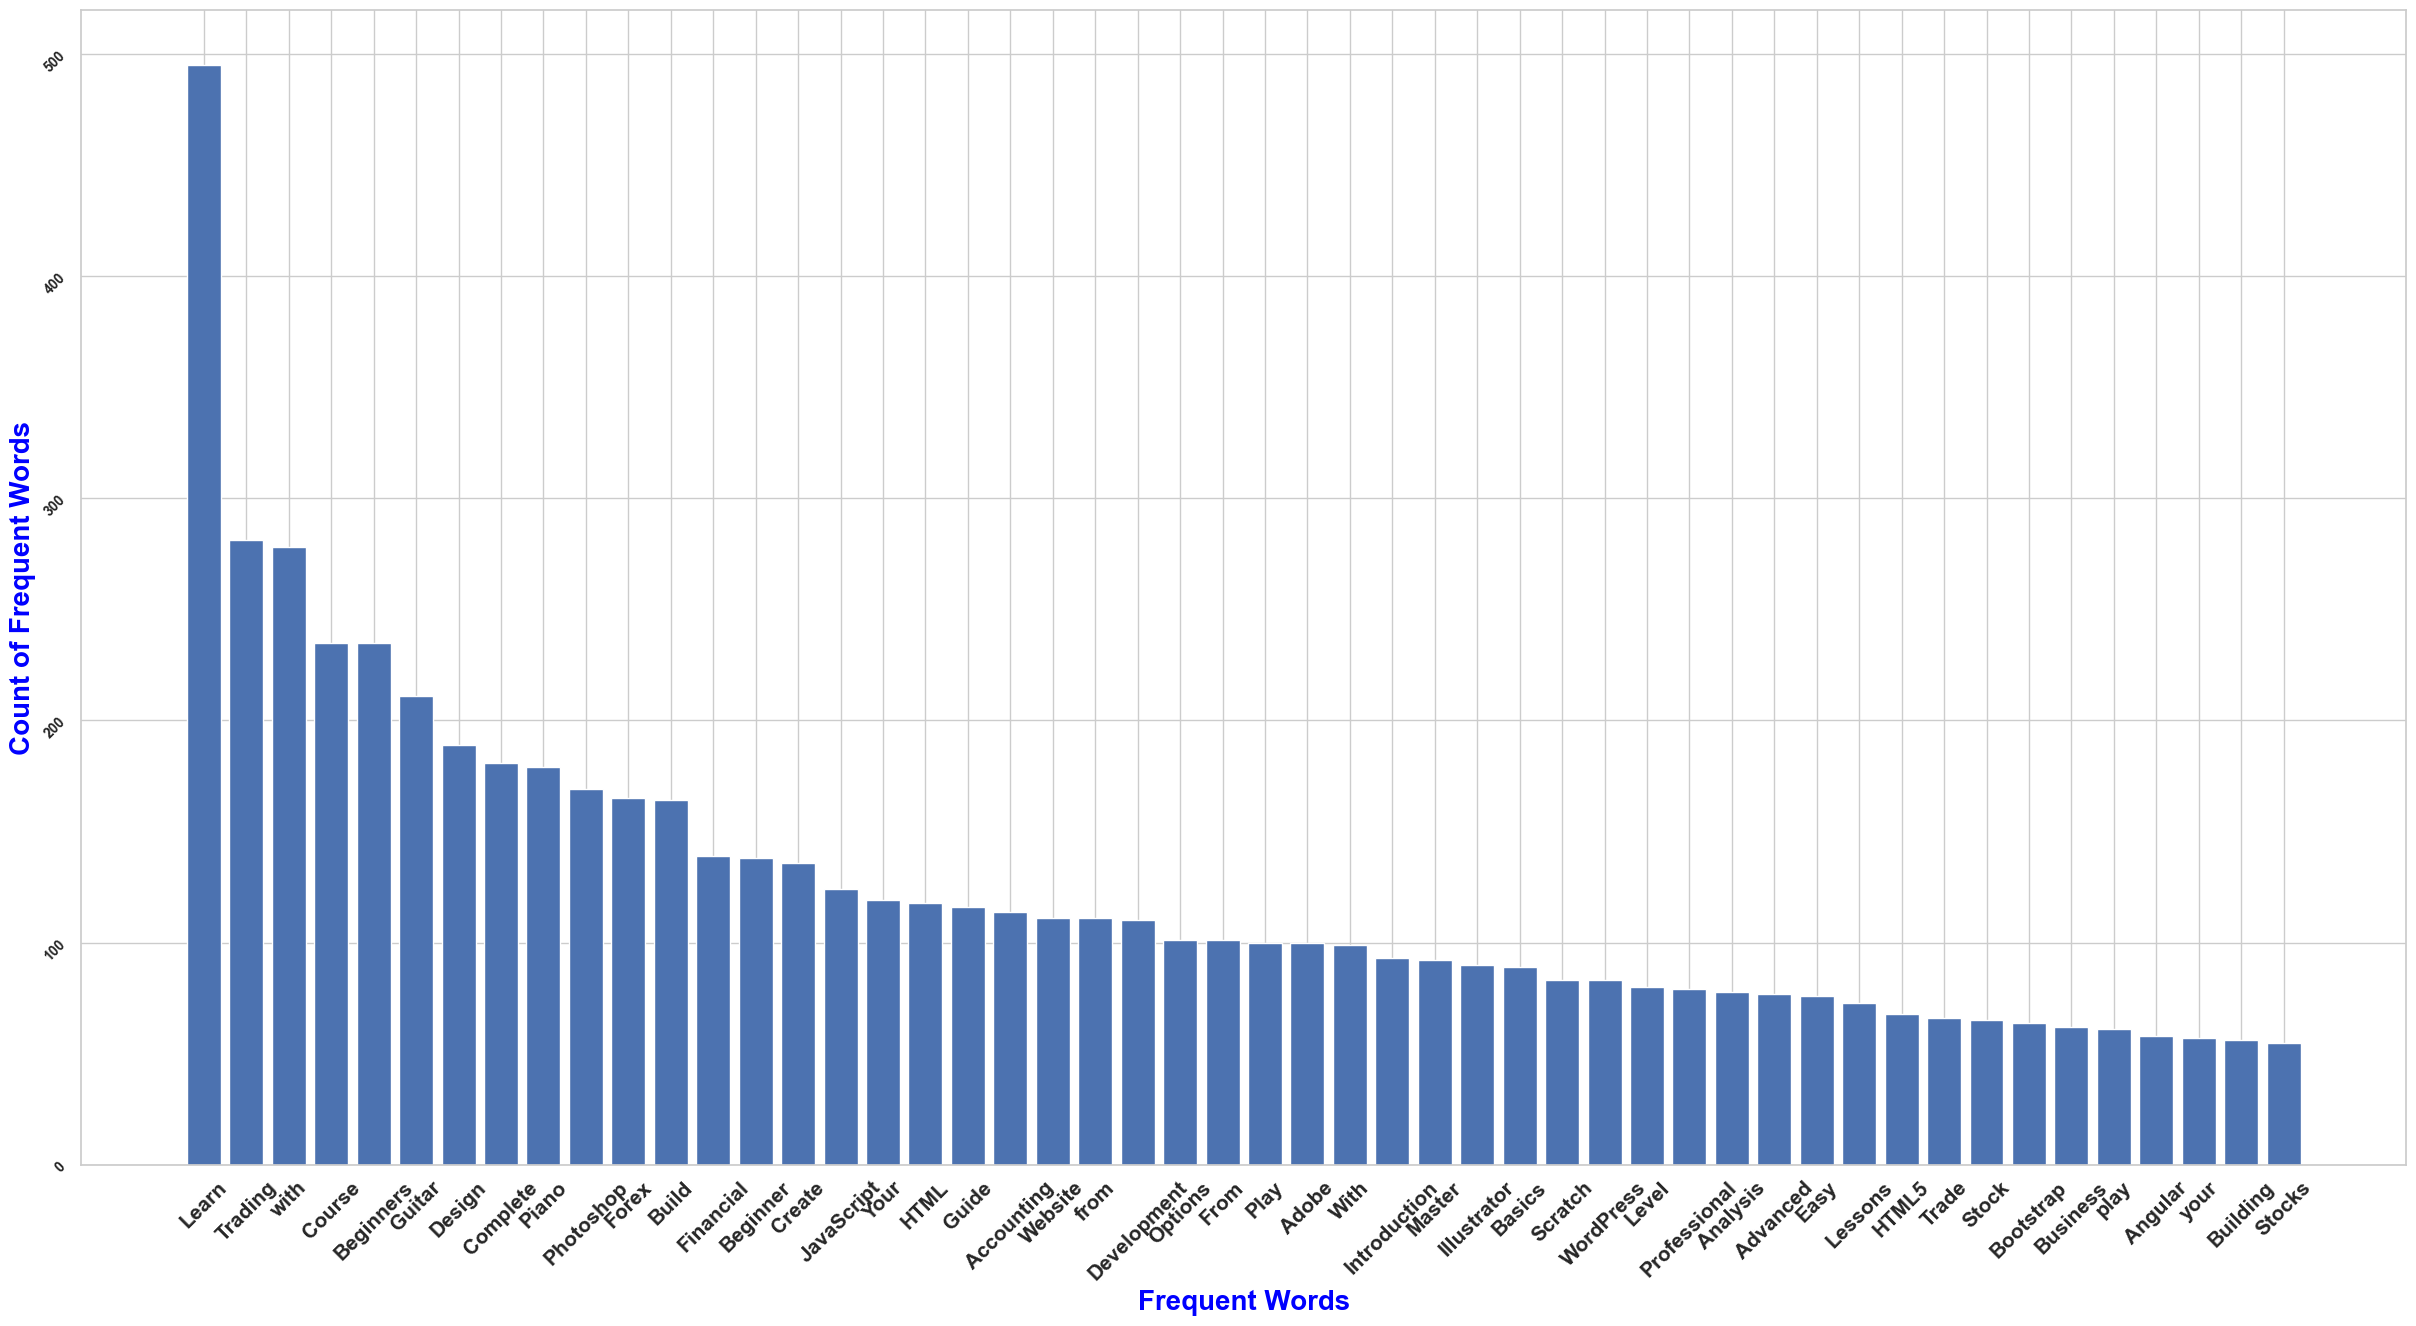

In [164]:
plt.figure(figsize=(30,15))
plt.bar(*zip(*freq_words.items()))
plt.xticks(rotation = 45)

plt.xticks(fontsize = 15,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 10,fontweight = 'bold',rotation = 45)
plt.xlabel('Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Count of Frequent Words',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

In [158]:
!pip install rake_nltk

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.6.3-cp38-cp38-win_amd64.whl (268 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)


In [165]:
from rake_nltk import Rake
rake = Rake()
allwords = ''.join(alltokens)
rake.extract_keywords_from_text(allwords)

In [166]:
rake.get_ranked_phrases_with_scores()

[(1.0,
  'ultimateinvestmentbankingcoursecompletecoursecertificationgrowyourpracticefinancialmodelingbusinessanalystsconsultantsbeginnerfinancialanalysisexcel2017maximizeyourprofitstradingoptionstradingpennystocksguidelevels2017investingtradingbeginnersmasteringpricechartstradingstockchartpatternsimmediateexplosivegainsoptionstradingadvancedstockprofitsuccessmethodonlyinvestmentstrategyneedyourretirementforextradingsecretsproswithamazontradingoptionswithmoneyflowfinancialmanagementriskreturnsecuritiesforextradingcourseworksmarterharderprovenresultspythonalgotradingsentimenttradingwithnewsshortsellinglearnsellstocksbeforefallbasictechnicalanalysislearnstructuremarketcompletechartpatterntradingcourseprovenapproachdeadlymistakesinvestingthatwillslashyourprofitsfinancialstatementsmadeeasywinningforextradingwithliveforextradingexamplesforextraderscreateyourfirsttradingrobotcodingcreatebusinessfromhometradingstockstoday2017introductionaccountingmasteringfinancialstatementscompleteethereumcou

## EDA is_paid
1. Type under is_paid columns and their value_counts 

<Axes: xlabel='is_paid'>

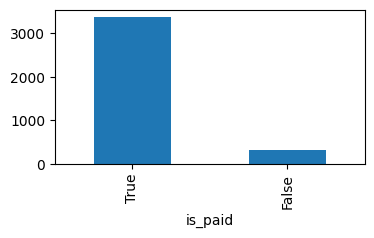

In [14]:
df['is_paid'].value_counts().plot(kind='bar',figsize=(4,2))

## EDA Subject
1. Distribution of subject with pie chart
2. Distribution of subject with bar chart and is_paid
3. Subjectwise number of subscribers
4. Distribution of Subject and level 
5. Subject wise price distribution
6. Yearwise subject 

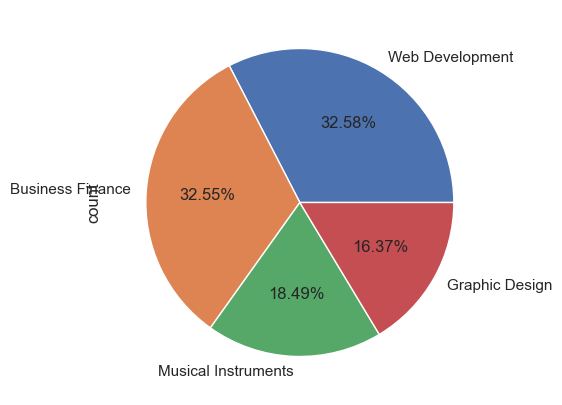

In [65]:
#Distribution of Subject
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

<Axes: xlabel='subject', ylabel='count'>

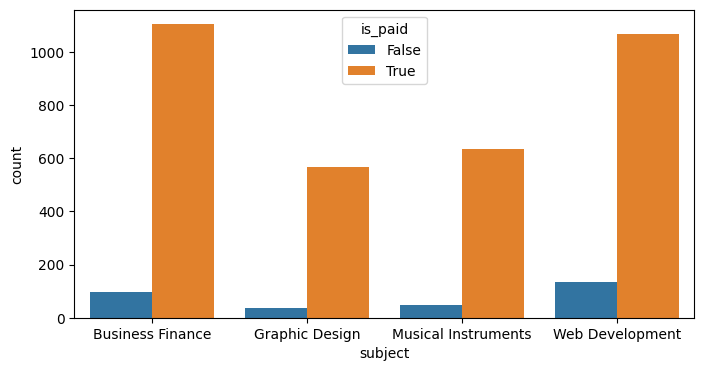

In [16]:
#Distribution of Subject w.r.to "payment"
plt.figure(figsize=(8,4))
sns.countplot(x=df['subject'],data=df,hue = "is_paid")

<Axes: ylabel='subject'>

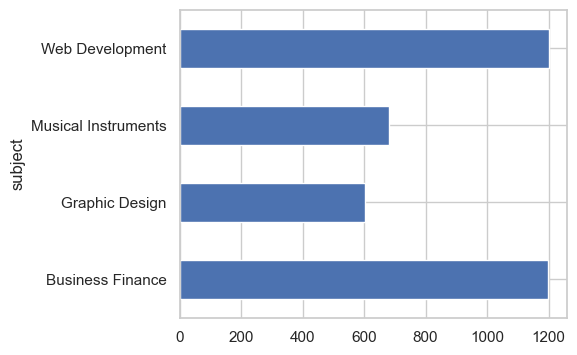

In [63]:
#Subject wise num_subscribers count
df.groupby('subject')['num_subscribers'].count().plot(kind='barh',figsize=(5,4))

Text(0, 0.5, 'Count of Levels')

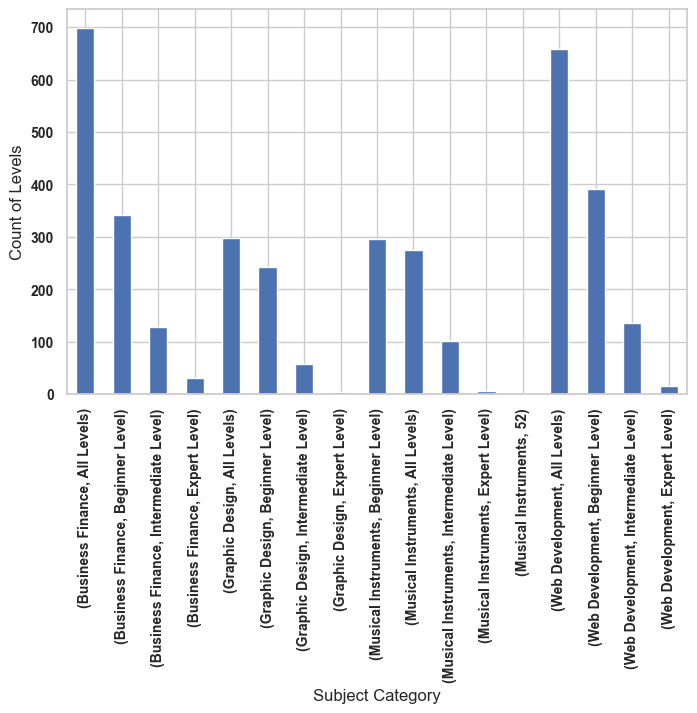

In [66]:
plt.figure(figsize=(8,5))
df.groupby('subject')['level'].value_counts().plot(kind='bar')
plt.xticks(fontsize = 10,fontweight = 'bold')
plt.yticks(fontsize = 10,fontweight = 'bold')
plt.xlabel('Subject Category')
plt.ylabel('Count of Levels')

<Axes: xlabel='subject', ylabel='price'>

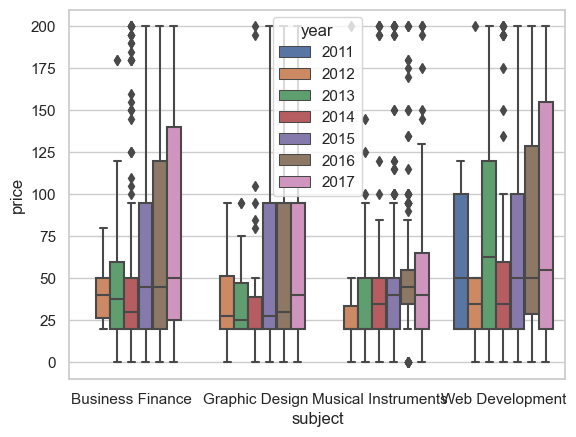

In [67]:
#Subject wise price
sns.set(style='whitegrid')
sns.boxplot(x="subject",y="price",data=df,hue ="year")

In [172]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day', 'Year',
       'Month', 'Day', 'Month_name', 'Clean_title'],
      dtype='object')

<Axes: xlabel='subject', ylabel='num_subscribers'>

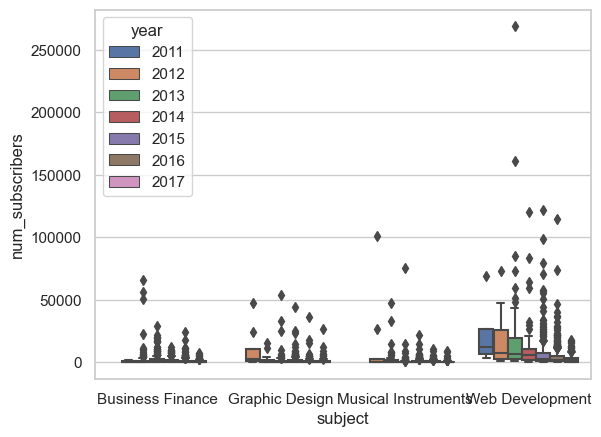

In [175]:
#Subject wise num_subscribers 
sns.set(style='whitegrid')
sns.boxplot(x="subject",y="num_subscribers",data=df,hue ="year")

In [168]:
df.groupby('year')['subject'].value_counts().plot(kind='barh')

<Axes: ylabel='year,subject'>

## EDA price
1. Distribution of price with bar plot
2. distribution of subject having max. price : Business Finance (count 140) followed by web development (110)

In [69]:
df['price'] = df['price'].astype('float')

<Axes: xlabel='price'>

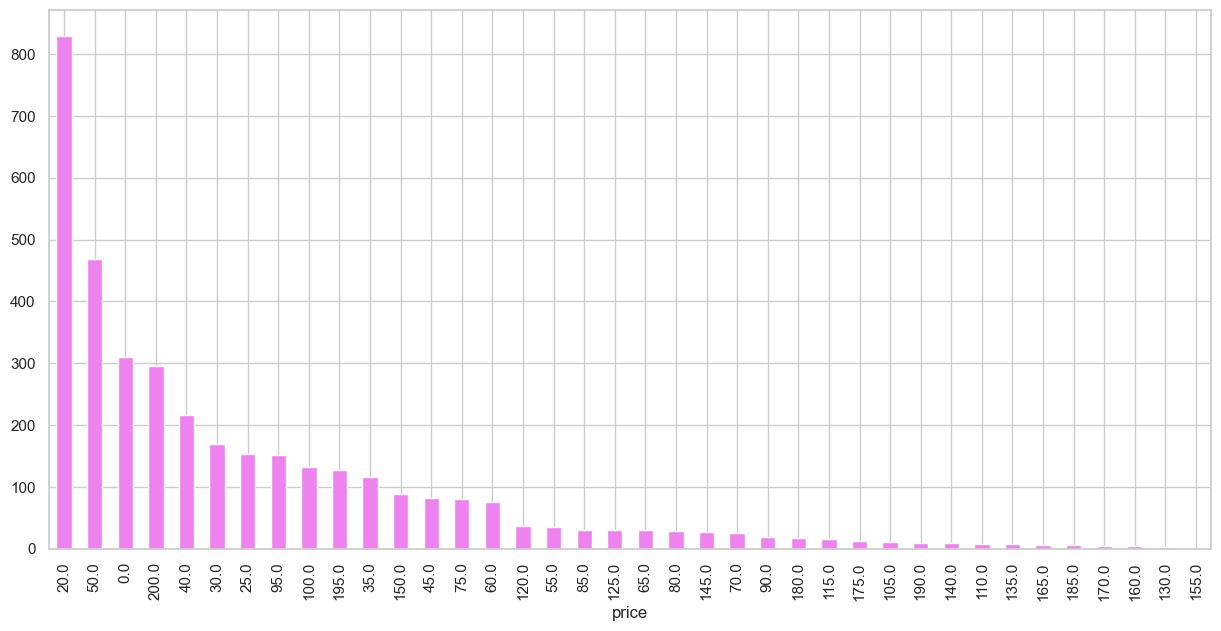

In [70]:
plt.figure(figsize=(15,7))
df['price'].value_counts().plot(kind = 'bar',color = 'violet')

In [87]:
#Distribution of Subject for which price charge is maximun
df[(df['price']==max(df['price']))]['subject'].value_counts().plot(kind='barh',figsize=(5,4),cmap = 'plasma')# max Price Subject wise course breakup

<Axes: ylabel='subject'>

In [181]:
#Average price of course
df['price'].mean()

66.01032047800109

### EDA Level & Reviews
 1. Distribution of Level and Reviews
 2. course_title for which max num_reviews received

In [22]:
df['level'].value_counts().plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

In [25]:
df['num_reviews'].sort_values(ascending=False)

3235    27445
3237    22412
3209    19649
3252    16976
3259    15117
        ...  
1239        0
1238        0
1213        0
1193        0
1657        0
Name: num_reviews, Length: 3683, dtype: int64

In [26]:
# course_title for which max num_reviews received
df[df['num_reviews']==max(df['num_reviews'])]

course_id                course_title  \
3235     625204  The Web Developer Bootcamp   

                                                    url  is_paid  price  \
3235  https://www.udemy.com/the-web-developer-bootcamp/     True    200   

      num_subscribers  num_reviews  num_lectures       level content_duration  \
3235           121584        27445           342  All Levels         43 hours   

       published_timestamp          subject    profit published_date  \
3235  2015-11-02T21:13:27Z  Web Development  24316800     2015-11-02   

     published_time  year  month  day  
3235      21:13:27Z  2015     11    2

In [39]:
## grouping the level as per persons intrest
df.groupby(['level'])['num_subscribers'].count().plot(kind='barh')

<Axes: ylabel='level'>

<Axes: xlabel='level'>

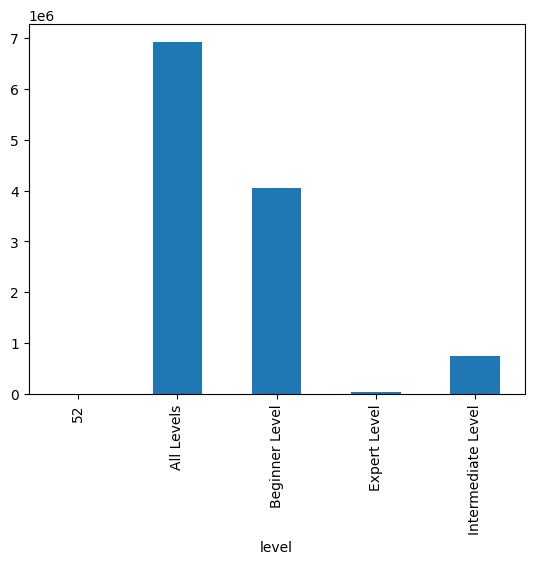

In [40]:
df.groupby(['level'])['num_subscribers'].sum().plot(kind = 'bar')

In [44]:
# How many levels per subject category
df.groupby(['subject'])['level'].count().plot(kind = 'bar',color = 'green',figsize=(5,4))

<Axes: xlabel='subject'>

## EDA 'num_subscribers', 'num_reviews', 'num_lectures'

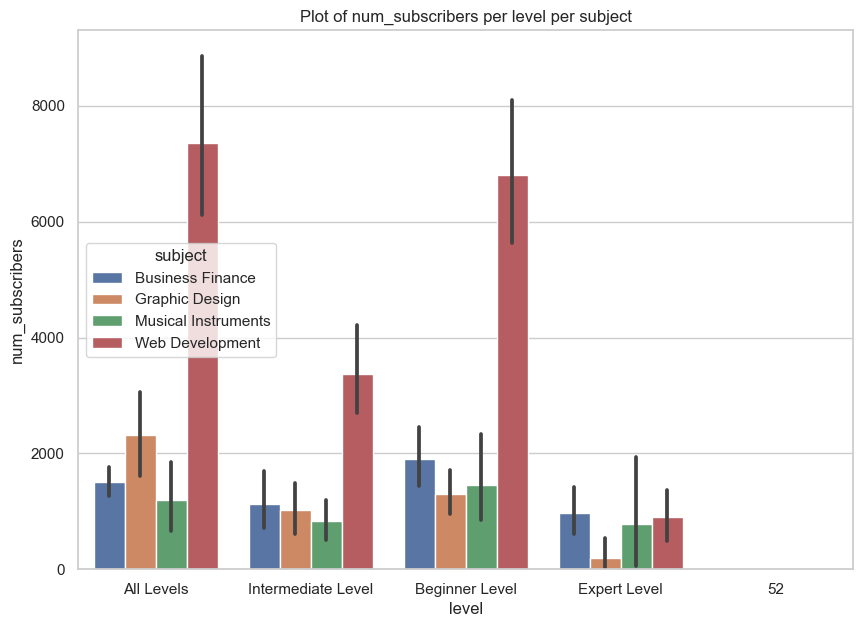

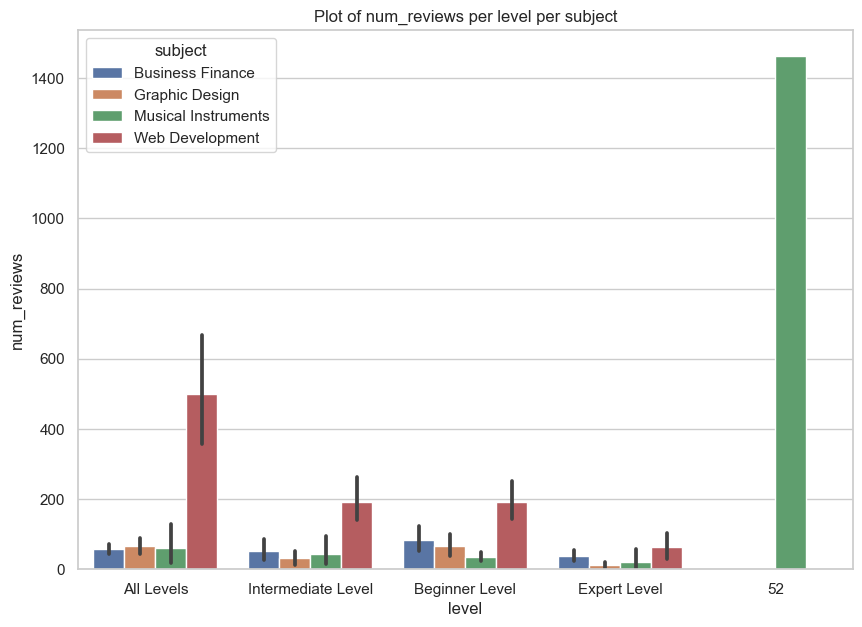

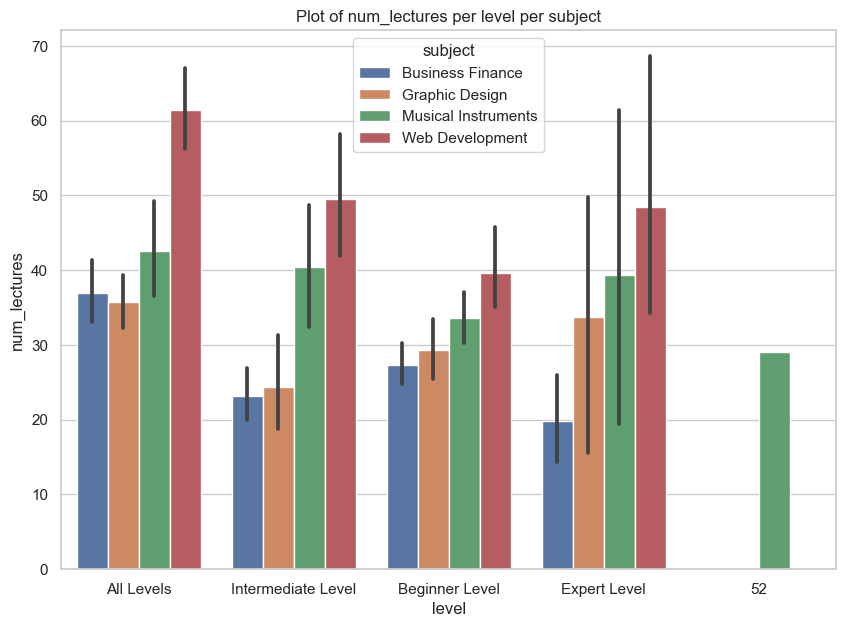

In [56]:
# reviews_level plot and lectures_level plot

def plotdata(df,feature):
    plt.figure(figsize=(10,7))
    plt.title("Plot of {} per level per subject".format(feature))
    sns.barplot(x = 'level',y = feature,data=df,hue = 'subject')
    plt.show()
    
    
featureslist = ['num_subscribers', 'num_reviews', 'num_lectures']
for feature in featureslist:
    plotdata(df,feature)

## EDA Price & profit
- What is the average price of a course
- How much does Udemy earn
- The most profitable courses

In [72]:
# What is the most profitable course
# price x num_subscriber
df['profit'] = df['price'] * df['num_subscribers']
df.head(3)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True  200.0   
1      https://www.udemy.com/goods-and-services-tax/     True   75.0   
2  https://www.udemy.com/financial-modeling-for-b...     True   45.0   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   

  content_duration   published_timestamp           subject    profit  \
0        1.5 hours  2017-01-18T20:58:58Z  Business Finance  429400.0   
1         39 hours  2017-03-09T16:34:20Z  Business Finance  209400.0   
2        2.5 hours  2016-12-19T19:26:30Z  Business Finance   97830.0   

  published_date published_time  year  month  day  
0     2017-01-18      20:58:58Z  2017      1   18  
1     2017-03-09      16:34:20Z  2017      3    9  
2     2016-12-19      19:26:30Z  2016     12   19

In [179]:
#How much does Udemy earn
Total_profit=sum(df['profit'])
Total_profit

884982395.0

In [75]:
# The most profitable course
df[df['profit']==df['profit'].max()].style.background_gradient(cmap = 'plasma')

In [90]:
df.iloc[3235]

course_id                                                         625204
course_title                                  The Web Developer Bootcamp
url                    https://www.udemy.com/the-web-developer-bootcamp/
is_paid                                                             True
price                                                              200.0
num_subscribers                                                   121584
num_reviews                                                        27445
num_lectures                                                         342
level                                                         All Levels
content_duration                                                43 hours
published_timestamp                                 2015-11-02T21:13:27Z
subject                                                  Web Development
profit                                                        24316800.0
published_date                                     

In [92]:
# The least profitable course,these may be free course
    
df[df['profit']==min(df['profit'])].style.background_gradient(cmap = 'gray')

In [99]:
# Average profitable course
df[df['profit']>=df['profit'].mean()].style.background_gradient(cmap = 'plasma')

## Correlation Question
+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

In [100]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

In [102]:
sns.scatterplot(data=df,x='price',y='num_subscribers')

<Axes: xlabel='price', ylabel='num_subscribers'>

In [104]:
sns.scatterplot(data=df,x = 'price',y = 'num_reviews')

<Axes: xlabel='price', ylabel='num_reviews'>

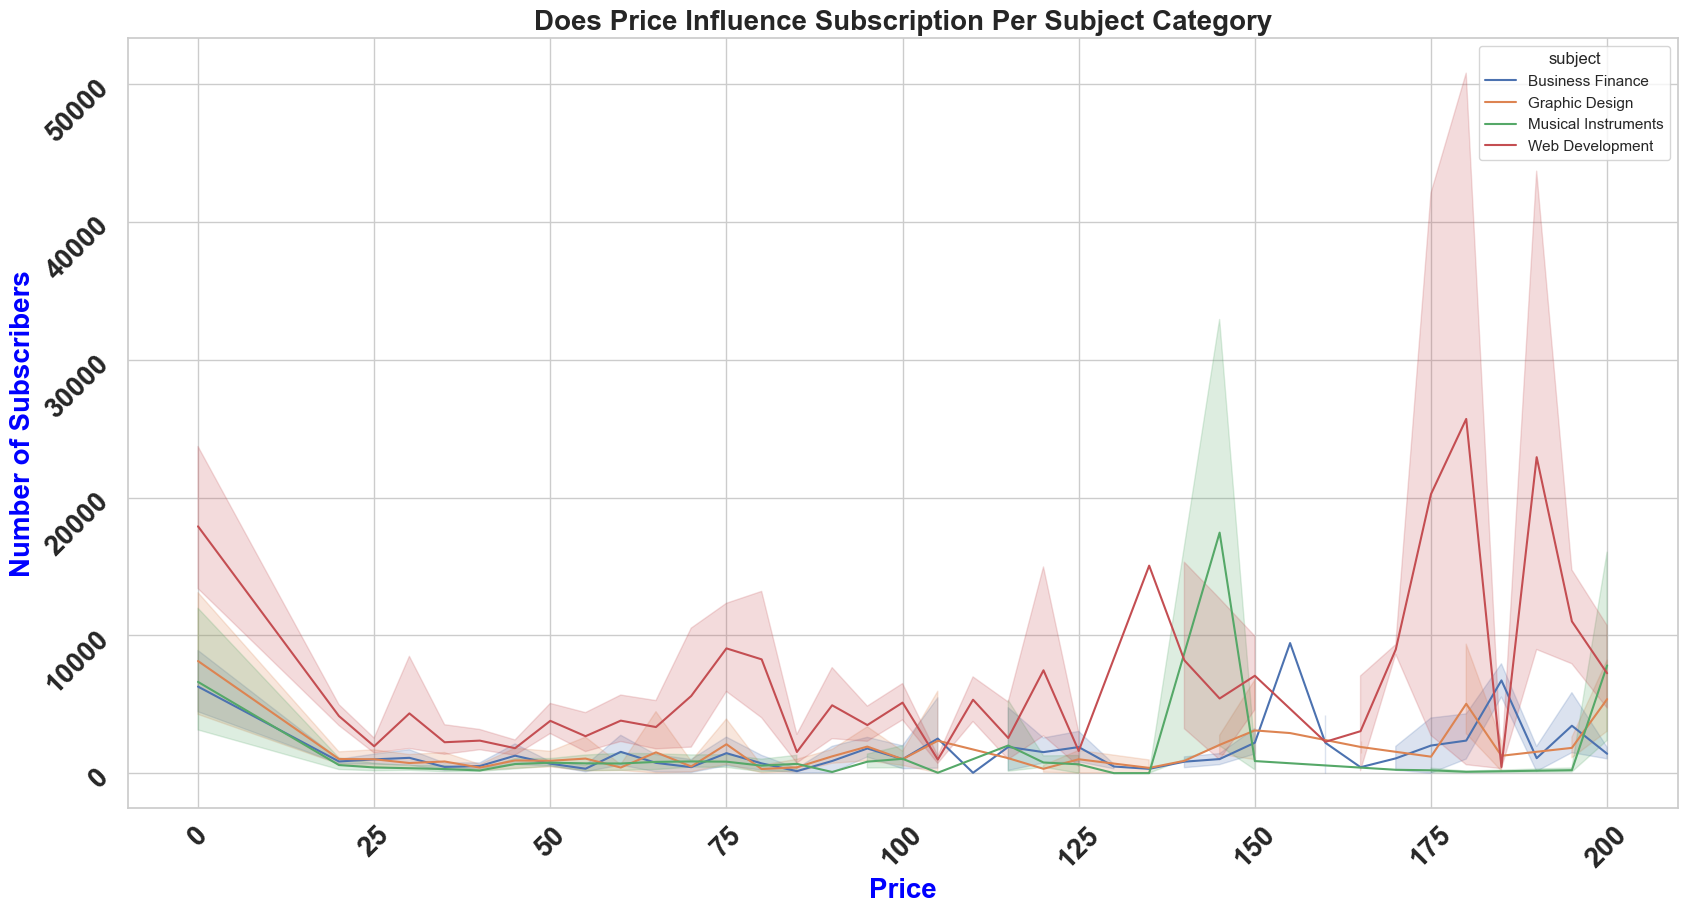

In [183]:
#Does Price Influence Subscription Per Subject Category
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category",
         fontsize = 20,fontweight = 'bold')

sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')

plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Price',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Number of Subscribers',fontsize = 20,fontweight = 'bold',
           color = 'blue')

plt.show()

## EDA Published Year
Number of courses per year
Distribution of subjects per year
Which year has the highest number of courses
What is the trend of courses per year


In [108]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [ ]:
# we need to extract year,month,date from the published timestamp
# so for that i will extract the year-month-date from the timestamp 

df['published_date'] = df['published_timestamp'].apply(lambda x:x.split('T')[0])

In [111]:
df['published_timestamp']=df['published_timestamp'].apply(lambda x:x.split("T")[0])

In [112]:
df.head(2)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True  200.0   
1      https://www.udemy.com/goods-and-services-tax/     True   75.0   

   num_subscribers  num_reviews  num_lectures       level content_duration  \
0             2147           23            51  All Levels        1.5 hours   
1             2792          923           274  All Levels         39 hours   

  published_timestamp           subject    profit published_date  \
0          2017-01-18  Business Finance  429400.0     2017-01-18   
1          2017-03-09  Business Finance  209400.0     2017-03-09   

  published_time  year  month  day  
0      20:58:58Z  2017      1   18  
1      16:34:20Z  2017      3    9

In [118]:
year=pd.to_datetime(df['published_timestamp'],format="%Y-%m-%d")

ValueError: time data "3 hours" doesn't match format "%Y-%m-%d", at position 2066. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [125]:
df.iloc[2066] # in error message time data "3 hours" doesn't match format "%Y-%m-%d", at position 2066

course_id                                                          96698
course_title           Learn Classical Guitar Technique and play 'Spa...
url                                                                000!"
is_paid                                                             True
price                                                                0.0
num_subscribers                                                       30
num_reviews                                                         1463
num_lectures                                                          29
level                                                                 52
content_duration                                          Beginner Level
published_timestamp                                              3 hours
subject                                              Musical Instruments
profit                                                               0.0
published_date                                     

In [128]:
df=df.drop(df.index[2066])

In [132]:
df['published_date']=pd.to_datetime(df['published_timestamp'],format="%Y-%m-%d")

In [133]:
df.head(2)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True  200.0   
1      https://www.udemy.com/goods-and-services-tax/     True   75.0   

   num_subscribers  num_reviews  num_lectures       level content_duration  \
0             2147           23            51  All Levels        1.5 hours   
1             2792          923           274  All Levels         39 hours   

  published_timestamp           subject    profit published_date  \
0          2017-01-18  Business Finance  429400.0     2017-01-18   
1          2017-03-09  Business Finance  209400.0     2017-03-09   

  published_time  year  month  day  
0      20:58:58Z  2017      1   18  
1      16:34:20Z  2017      3    9

In [135]:
df['Year'] = df['published_date'].dt.year

df['Month'] = df['published_date'].dt.month

df['Day'] = df['published_date'].dt.day

df['Month_name'] = df['published_date'].dt.month_name()


df.head(2)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True  200.0   
1      https://www.udemy.com/goods-and-services-tax/     True   75.0   

   num_subscribers  num_reviews  num_lectures       level content_duration  \
0             2147           23            51  All Levels        1.5 hours   
1             2792          923           274  All Levels         39 hours   

   ...    profit published_date  published_time  year month  day  Year  Month  \
0  ...  429400.0     2017-01-18       20:58:58Z  2017     1   18  2017      1   
1  ...  209400.0     2017-03-09       16:34:20Z  2017     3    9  2017      3   

   Day  Month_name  
0   18     January  
1    9       March  

[2 rows x 22 columns]

In [136]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day', 'Year',
       'Month', 'Day', 'Month_name'],
      dtype='object')

In [137]:
# profit year wise

plt.figure(figsize=(15,7))
df.groupby(['Year'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')

Text(0, 0.5, 'Profit')

Text(0, 0.5, 'Profit')

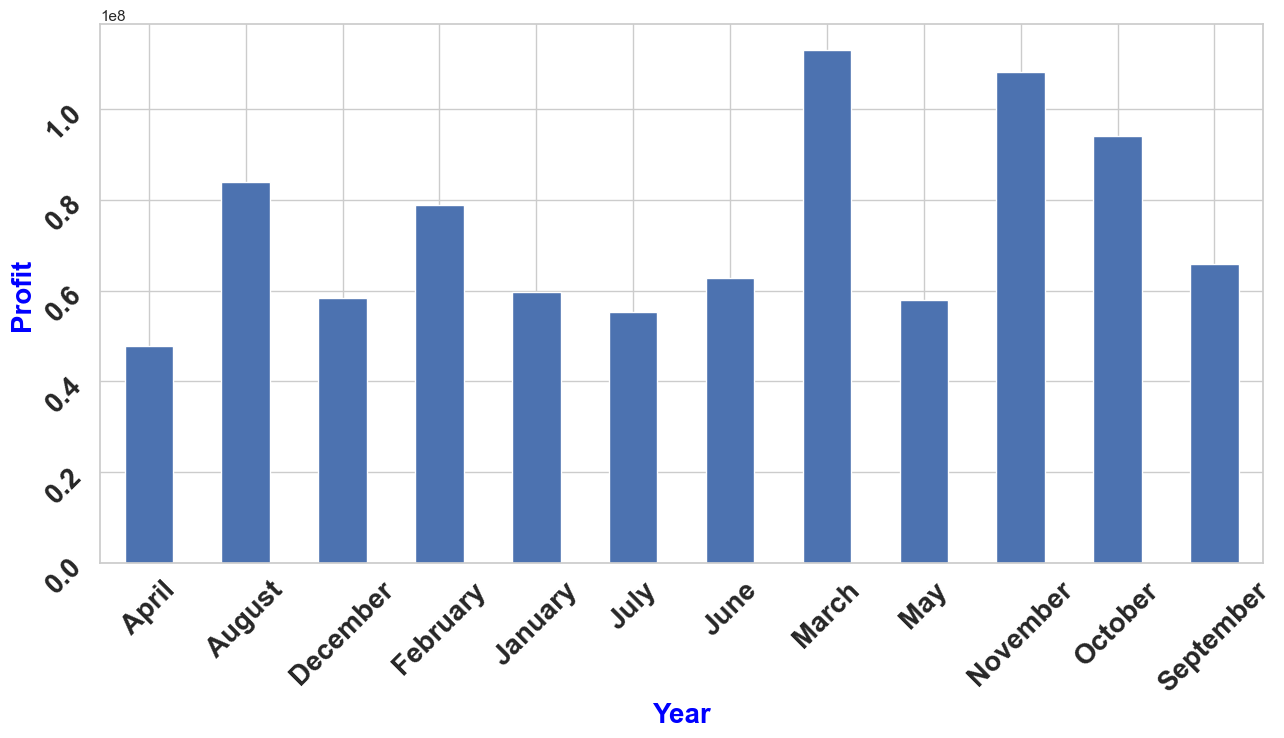

In [138]:
# profit month wise

plt.figure(figsize=(15,7))
df.groupby(['Month_name'])['profit'].sum().plot(kind = 'bar')
plt.xticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.yticks(fontsize = 20,fontweight = 'bold',rotation = 45)
plt.xlabel('Year',fontsize = 20,fontweight = 'bold',
           color = 'blue')
plt.ylabel('Profit',fontsize = 20,fontweight = 'bold',
           color = 'blue')